In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#CustomerID does not matter in segmentation , so lets drop the column
data = data.drop(columns = 'CustomerID')
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
#Lets consider male as 0 and female as 1 to get numeric value in Gender column
data = data.rename(columns={'Genre' : 'Gender'})
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
#Lets consider male as 0 and female as 1 to get numeric value in Gender column
data = data.replace({'Gender' : {'Male':0 ,
                                'Female':1}})
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [11]:
data['Gender'].unique()

array([0, 1])

In [12]:
#Normalize the data
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns = data.columns
norm_data = norm.fit_transform(data)

norm_data = pd.DataFrame(norm_data,columns = columns)
norm_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.413925,0.326783,0.849635
1,0.000000,0.247025,0.176446,0.952809
2,0.037987,0.759737,0.607790,0.227921
3,0.012203,0.280676,0.195253,0.939653
4,0.018728,0.580581,0.318383,0.749137


In [13]:
#Clustering Phase
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(norm_data)
pred = kmeans.predict(norm_data)

In [14]:
pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [15]:
len(pred)

200

In [16]:
#Calculating the inertia
kmeans.inertia_

15.236147767255536

In [17]:
#To check the value of n_clusters
list = []
for cluster in range(1,15):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(norm_data)
    pred = kmeans.inertia_
    list.append(pred)

In [18]:
frame = pd.DataFrame({'Cluster':range(1,15) , 'Inertia':list})

<function matplotlib.pyplot.show(close=None, block=None)>

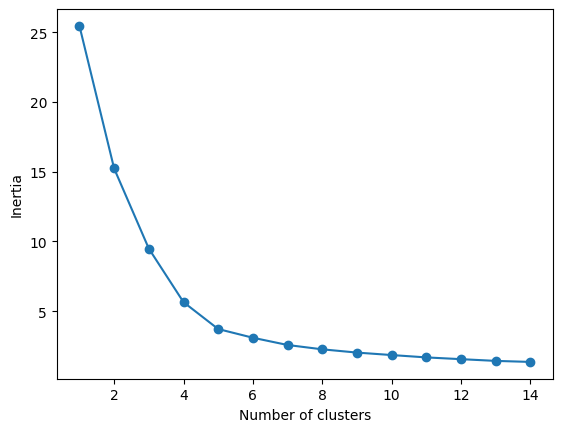

In [19]:
plt.plot(figsize=(7,5))
plt.plot(frame['Cluster'],frame['Inertia'],marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show

In [20]:
#We take number of clusters as 5
kmeans = KMeans(n_clusters = 5)
kmeans.fit(norm_data)
predictions = kmeans.predict(norm_data)

In [21]:
norm_data['Cluster'] = predictions
print(norm_data)

       Gender       Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    0.000000  0.413925            0.326783                0.849635        3
1    0.000000  0.247025            0.176446                0.952809        3
2    0.037987  0.759737            0.607790                0.227921        4
3    0.012203  0.280676            0.195253                0.939653        3
4    0.018728  0.580581            0.318383                0.749137        3
..        ...       ...                 ...                     ...      ...
195  0.006762  0.236686            0.811496                0.534235        2
196  0.007315  0.329196            0.921748                0.204833        0
197  0.000000  0.213924            0.842324                0.494698        2
198  0.000000  0.225615            0.965915                0.126909        0
199  0.000000  0.184087            0.840665                0.509308        2

[200 rows x 5 columns]


In [22]:
#Plot 2 features against each other at a time
def seg(str_x,str_y,clusters):
    x=[]
    y=[]

    for i in range(clusters):
        x.append(norm_data[str_x][norm_data['Cluster'] == i])
        y.append(norm_data[str_y][norm_data['Cluster'] == i])

    return x,y

def plot_clusters(str_x,str_y,clusters):
    plt.figure(figsize=(5,5),dpi=120)
    x,y = seg(str_x,str_y,clusters)

    for i in range(clusters):
        plt.scatter(x[i],y[i],label='Cluster{}'.format(i))

    plt.xlabel(str_x,fontsize = 10)
    plt.ylabel(str_y,fontsize = 10)
    plt.title(str(str_x+" Vs "+str_y),fontsize = 15)
    plt.legend()

In [23]:
norm_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,0.413925,0.326783,0.849635,3
1,0.000000,0.247025,0.176446,0.952809,3
2,0.037987,0.759737,0.607790,0.227921,4
3,0.012203,0.280676,0.195253,0.939653,3
4,0.018728,0.580581,0.318383,0.749137,3


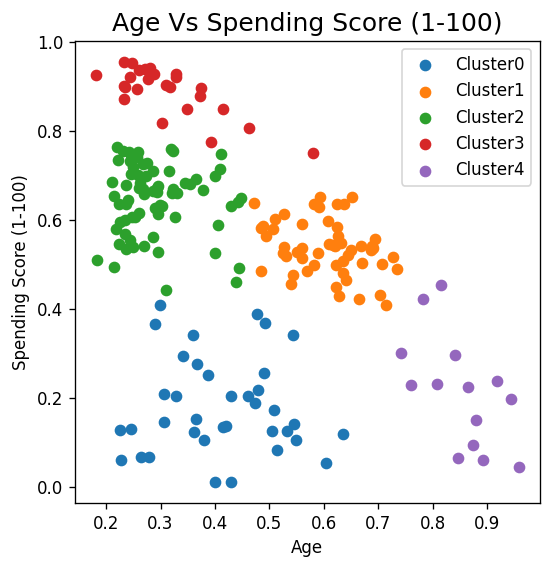

In [24]:
#Age vs Spending Score
plot_clusters('Age','Spending Score (1-100)',5)

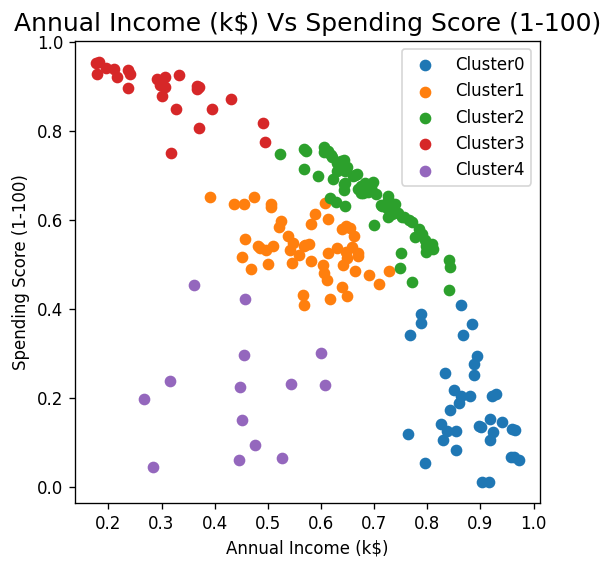

In [25]:
#Annual Income vs Spending Score
plot_clusters('Annual Income (k$)','Spending Score (1-100)',5)

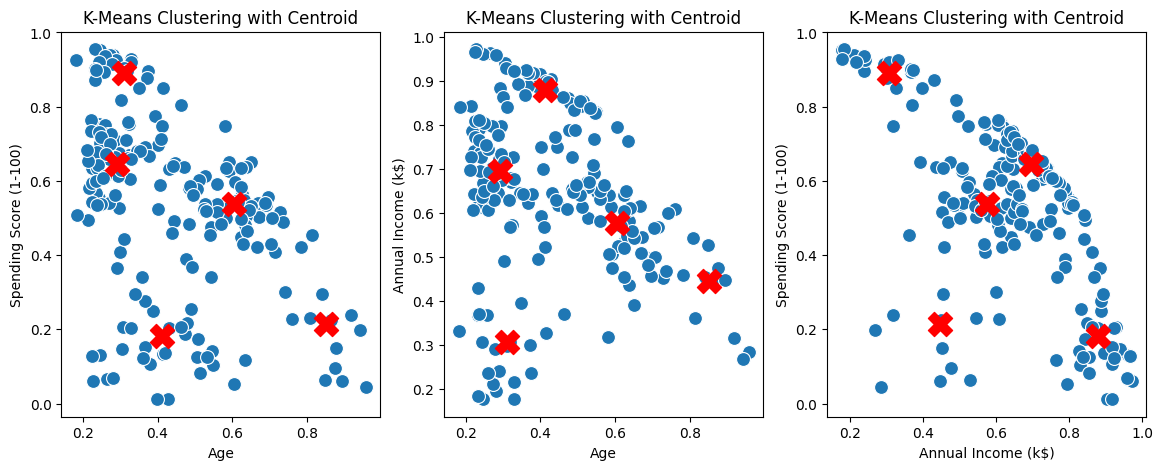

In [26]:
# Plotting the results
feature_x = 'Age'
feature_y = 'Annual Income (k$)'
feature_z = 'Spending Score (1-100)'

plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.scatterplot(data=norm_data,x = feature_x, y=feature_z ,palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='X')
plt.title('K-Means Clustering with Centroid')
plt.xlabel(feature_x)
plt.ylabel(feature_z)

plt.subplot(1,3,2)
sns.scatterplot(data=norm_data,x = feature_x, y=feature_y ,palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X')
plt.title('K-Means Clustering with Centroid')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

plt.subplot(1,3,3)
sns.scatterplot(data=norm_data,x = feature_y, y=feature_z ,palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='X')
plt.title('K-Means Clustering with Centroid')
plt.xlabel(feature_y)
plt.ylabel(feature_z)
plt.show()

In [27]:
kmeans.labels_

array([3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 1, 3,
       4, 3, 4, 3, 1, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 1, 3,
       1, 3, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [28]:
data['Label'] = kmeans.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,0,19,15,39,3
1,0,21,15,81,3
2,1,20,16,6,4
3,1,23,16,77,3
4,1,31,17,40,3


In [29]:
data.Label.value_counts()

Label
2    71
1    53
0    37
3    25
4    14
Name: count, dtype: int64

In [30]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(data[data['Label'] == k].describe())
    print('\n\n')

cluster nb : 0
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  Label
count  37.000000  37.000000           37.000000               37.000000   37.0
mean    0.459459  40.729730           87.297297               18.054054    0.0
std     0.505228  11.342273           16.390825               10.461426    0.0
min     0.000000  19.000000           70.000000                1.000000    0.0
25%     0.000000  34.000000           77.000000               10.000000    0.0
50%     0.000000  42.000000           81.000000               16.000000    0.0
75%     1.000000  47.000000           97.000000               26.000000    0.0
max     1.000000  59.000000          137.000000               39.000000    0.0



cluster nb : 1
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  Label
count  53.000000  53.000000           53.000000               53.000000   53.0
mean    0.584906  53.075472           50.867925               47.000000    1.0
std     0.497454  1